<a href="https://colab.research.google.com/github/PhaellZX/DATA-SCIENCE/blob/main/Iris_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris Species
Classify iris plants into three species in this classic dataset.

In [ ]:
import pandas as pd
data = pd.read_csv('sample_data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data['Species'] = data['Species'].replace('Iris-setosa',1) # Iris-setosa
data['Species'] = data['Species'].replace('Iris-versicolor',2) # Iris-versicolor
data['Species'] = data['Species'].replace('Iris-virginica',3) # Iris-virginica
data['Species'].value_counts()

1    50
2    50
3    50
Name: Species, dtype: int64

## Machine Learning
Training the model.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = data.drop('Species',axis=1)
y = data.Species

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
neigh.score(X, y)

1.0

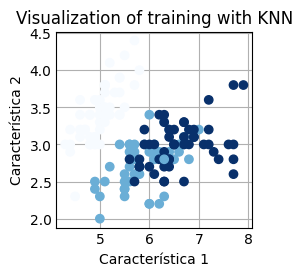

In [ ]:
# SCATTER PLOT

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Carrega o dataset iris
iris = load_iris()
X = iris.data
y = iris.target

# Treina um modelo KNN
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

# Faz as previsões no dataset de treinamento
y_pred = neigh.predict(X)

# Plota um gráfico scatter dos dados de treinamento com as previsões do modelo
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('Visualization of training with KNN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


In [ ]:
# Decision Tree
from sklearn import tree
clfTree = tree.DecisionTreeClassifier(random_state=0)
clfTree = clfTree.fit(X, y)
clfTree.score(X,y)

1.0

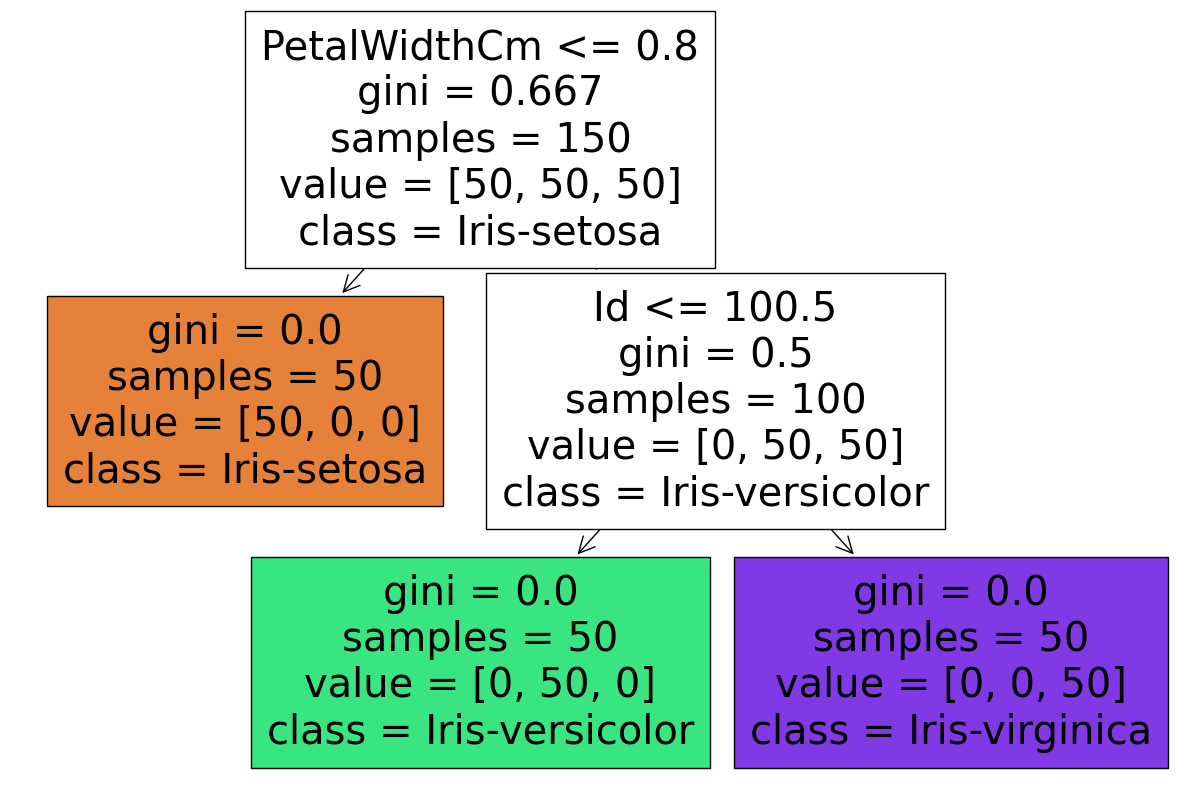

In [ ]:
# PLOT_TREE

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Obs: A saídas devem por atuibutos e não continuos(Binário)

df = pd.read_csv('sample_data/Iris.csv')

# Separar as features dos labels
X = df.iloc[:, :-1]  # Todas as colunas exceto a última
y = df.iloc[:, -1]   # Última coluna

# Treinar modelo
clfTree = DecisionTreeClassifier(random_state=0)
clfTree = clfTree.fit(X, y)

# Plotar árvore de decisão
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(clfTree, filled=True, ax=ax, feature_names=X.columns, class_names=y.unique())
plt.show()


In [ ]:
# Linear Regression
from sklearn.linear_model import LogisticRegression
clfLog = LogisticRegression(random_state=0,max_iter=1000).fit(X, y)
clfLog.score(X,y)

1.0

##Evaluating the model

In [ ]:
X_train = data.drop('Species',axis=1)
y_train = data.Species

X_test = data.drop('Species',axis=1)
y_test = data.Species

In [ ]:
neight = neigh.fit(X_train, y_train)
clfTree = clfTree.fit(X_train, y_train)
clfLog = clfLog.fit(X_train, y_train)

In [ ]:
pred_KNN = neigh.predict(X_test)
pred_Tree = clfTree.predict(X_test)
pred_Log = clfLog.predict(X_test)

In [ ]:
# Importando as métricas de avaliação
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# Accuracy
print(accuracy_score(y_test,pred_KNN))
print(accuracy_score(y_test,pred_Tree))
print(accuracy_score(y_test,pred_Log))  

1.0
1.0
1.0


In [ ]:
# Precision
print(precision_score(y_test,pred_KNN, average='macro'))
print(precision_score(y_test,pred_Tree, average='weighted'))
print(precision_score(y_test,pred_Log, average='weighted'))


1.0
1.0
1.0


In [ ]:
# Recall
print(recall_score(y_test,pred_KNN, average='macro'))
print(recall_score(y_test,pred_Tree, average='weighted'))
print(recall_score(y_test,pred_Log, average='weighted')) 

1.0
1.0
1.0


In [ ]:
print(pred_KNN)
print(pred_Tree)
print(pred_Log)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_KNN) # KNN

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [ ]:
confusion_matrix(y_test, pred_Tree) # Decision Tree

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [ ]:
confusion_matrix(y_test, pred_Log) # Linear Regression

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])